In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [3]:
train_original=train.copy()

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

test_original=test.copy()

In [7]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


# Data Pre-processing

## 1) Combine train and test dataset

In [8]:
combine=pd.concat([train,test],axis=0)

In [9]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [10]:
combine.tail()

,id,label,tweet
17192,49155,NaN,thought factory: left-right polarisation! #tru...
17193,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
17194,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,NaN,"happy, at work conference: right mindset leads..."
17196,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


## 2) Removing Twitter handles (@user) from the tweets

In [11]:
import re

In [12]:
def remove(text,pattern):
    match=re.findall(pattern,text)
    
    for i in match:
        text=text.replace(i,"")
    return text

In [13]:
combine['tweets_org']=np.vectorize(remove)(combine['tweet'],r"@[\w]*")

In [14]:
combine.head()

,id,label,tweet,tweets_org
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## 3) Removing Punctuations, numbers and special characters

In [15]:
combine['tweets_org']=combine['tweets_org'].str.replace(r'[^A-Za-z#]'," ")

<ipython-input-15-05ea53e2c775>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['tweets_org']=combine['tweets_org'].str.replace(r'[^A-Za-z#]'," ")


In [16]:
combine.head()

,id,label,tweet,tweets_org
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


## 4) Removing short words

In [17]:
def remove_short_words(text):
    temp=text.split()
    ans=""
    for i in temp:
        if len(i)>3:
            ans+=" "+i
    return ans

In [18]:
combine['tweets_org']=combine['tweets_org'].apply(remove_short_words)

In [19]:
combine.head(10)

,id,label,tweet,tweets_org
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids ...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelcha...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos dis...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


## 5) Making list of words of tweets and stemming

In [20]:
tokenized_tweets= combine['tweets_org'].apply(lambda x: x.split())
tokenized_tweets.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tweets_org, dtype: object

In [21]:
import nltk

In [22]:
from nltk.stem import PorterStemmer

In [23]:
def stemming_words(text):
    st=PorterStemmer()
    for i in range(len(text)):
        text[i]=st.stem(text[i])
        
    return text

In [24]:
tokenized_tweets=tokenized_tweets.apply(stemming_words)

In [25]:
tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tweets_org, dtype: object

In [26]:
def stitch_back(text):
    text=' '.join(text)
    
    return text

In [27]:
tokenized_tweets=tokenized_tweets.apply(stitch_back)

In [28]:
tokenized_tweets.head()

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
3                           #model love take with time
4                             factsguid societi #motiv
Name: tweets_org, dtype: object

In [29]:
combine['tweets_org']=tokenized_tweets
combine.head()

,id,label,tweet,tweets_org
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# Data Visualisation

In [30]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

## Generating WordCloud for tweets with label ‘0’

In [31]:
all_positive_words=' '.join(text for text in combine['tweets_org'][combine['label']==0])

In [33]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
word_cloud=WordCloud(height=800,width=800,stopwords=stop_words,min_font_size=10,background_color="white").generate(all_positive_words)

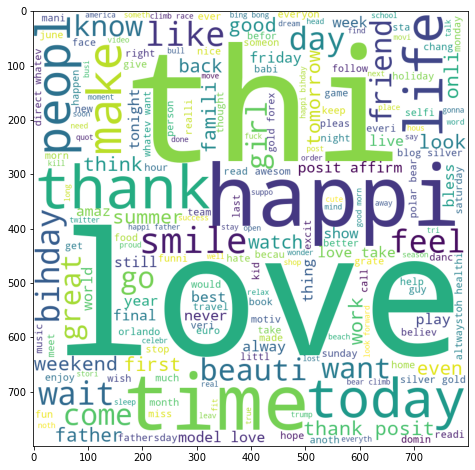

In [35]:
plt.figure(figsize=(8,8))
plt.imshow(word_cloud)
 
plt.show()

In [36]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

In [37]:
image_colors = ImageColorGenerator(Mask)

In [38]:
wordcloud=WordCloud(background_color="black",height=1500,width=4000,mask=Mask).generate(all_positive_words)

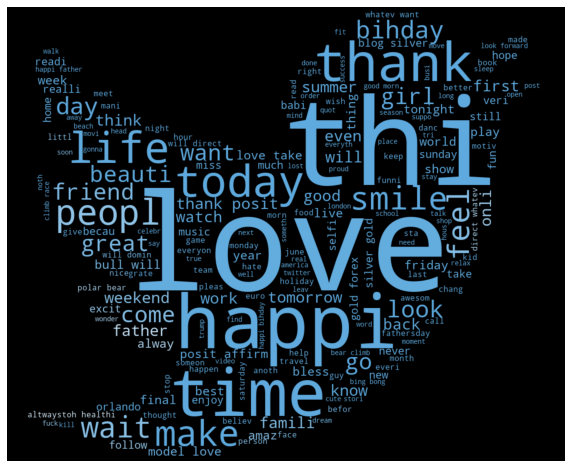

In [40]:
plt.figure(figsize=(10,20))

plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation="hamming")
plt.axis("off")
plt.show()

## Generating WordCloud for tweets with label ‘1’

In [43]:
all_negative_words=' '.join(text for text in combine['tweets_org'][combine['label']==1])

In [44]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

In [46]:
wc=WordCloud(background_color="black",height=1500,width=4000,mask=Mask,color_func=image_colors).generate(all_negative_words)

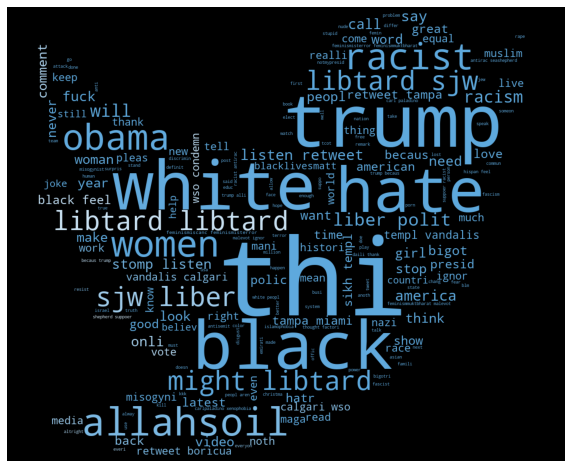

In [47]:
plt.figure(figsize=(10,20))

plt.imshow(wc)
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

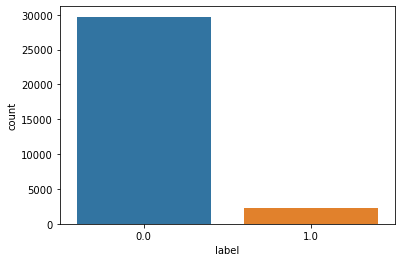

In [49]:
sns.countplot(data=train_original,x=combine['label'])

## Impact of hashtags on tweet sentiment

In [58]:
def hashtags_extract(text):
    hashtags=[]
    for i in text:
        hashtags.append(re.findall(r'#(\w+)',i))
    
    return hashtags

### A nested list of all the hashtags from the positive reviews from the dataset.

In [59]:
ht_positive=hashtags_extract(combine['tweets_org'][combine['label']==0])

In [63]:
ht_positive

29720

In [61]:
ht_positive_unnest = sum(ht_positive,[])

In [64]:
len(ht_positive_unnest)

68425

### A nested list of all the hashtags from the negative reviews from the dataset

In [65]:
ht_negative=hashtags_extract(combine[combine['label']==1]['tweets_org'])

In [66]:
ht_negative_unnest=sum(ht_negative,[])

In [68]:
ht_negative_unnest

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

In [75]:
from collections import Counter
words_freq_positive=Counter(ht_positive_unnest)

In [76]:
words_freq_positive

Counter({'run': 72,
         'lyft': 2,
         'disapoint': 1,
         'getthank': 2,
         'model': 375,
         'motiv': 202,
         'allshowandnogo': 1,
         'school': 30,
         'exam': 9,
         'hate': 27,
         'imagin': 7,
         'actorslif': 8,
         'revolutionschool': 1,
         'girl': 283,
         'allin': 4,
         'cav': 12,
         'champion': 5,
         'cleveland': 9,
         'clevelandcavali': 1,
         'ireland': 18,
         'blog': 356,
         'silver': 300,
         'gold': 301,
         'forex': 265,
         'orlando': 239,
         'standwithorlando': 2,
         'pulseshoot': 11,
         'orlandoshoot': 61,
         'biggerproblem': 1,
         'selfish': 3,
         'heabreak': 19,
         'valu': 8,
         'love': 1654,
         'gettingf': 1,
         'got': 9,
         'junior': 3,
         'yugyoem': 1,
         'omg': 27,
         'thank': 534,
         'posit': 917,
         'friday': 237,
         'cooki': 7,
  

In [77]:
df_positive=pd.DataFrame({'Hashtags':list(words_freq_positive.keys()),'Count':list(words_freq_positive.values())})
df_positive.head()

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [83]:
df_positive_plot=df_positive.sort_values('Count',ascending=False)[0:20]

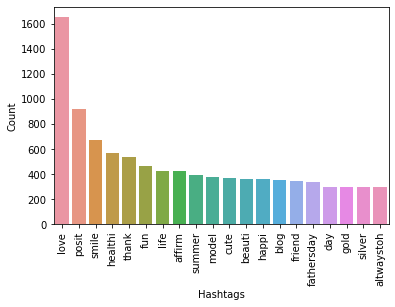

In [87]:
sns.barplot(data=df_positive_plot,x='Hashtags',y="Count")
plt.xticks(rotation=90);

In [88]:
words_freq_negative=Counter(ht_negative_unnest)

In [89]:
df_negative=pd.DataFrame({'Hashtags':list(words_freq_negative.keys()),'Count':list(words_freq_negative.values())})

In [94]:
df_negative_plot=df_negative.sort_values('Count',ascending=False)[0:20]

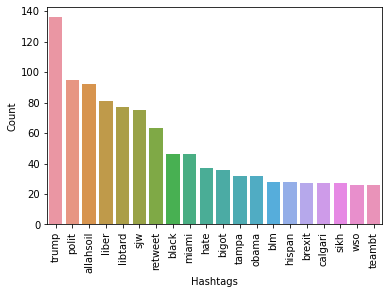

In [96]:
sns.barplot(data=df_negative_plot,x='Hashtags',y='Count')
plt.xticks(rotation=90);